In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [43]:
df = pd.read_csv("student_scores.csv")
df

,Sl.No.,USN,STUDENT NAME,TestI,TestII,TestIII,TestTotal,TestResult,Quiz1,Quiz2,Compensatory Quiz,QuizResult,Test + Quiz,Assignment,AssignmentResult,Result
0,1,1RV21MC001,ABHISHEK M,34,39,29.000000,1,4.0,6.0,10.0,16.0,45.000000,14,13,1,1
1,2,1RV21MC006,AJITH KUMAR K,30,33,30.000000,1,6.5,6.0,9.0,15.5,45.500000,14,13,1,1
2,3,1RV21MC009,AKASH E PUNAGIN,28,36,28.666667,1,7.0,5.0,NaN,12.0,40.666667,14,13,1,1
3,4,1RV21MC011,AMIT KUMAR,16,28,25.333333,1,3.0,2.0,10.0,13.0,38.333333,13,13,1,1
4,5,1RV21MC012,ANANDGOUDA PATIL,25,42,31.333333,1,6.0,5.0,10.0,16.0,47.333333,13,14,1,1
5,6,1RV21MC022,BHAKTHI PRABHU,27,33,27.333333,1,6.5,4.0,10.0,16.5,43.833333,14,14,1,0
6,7,1RV21MC025,BHAT DIVYA SUBRAHMANYA,32,45,35.000000,1,7.5,8.0,7.0,15.0,50.000000,15,15,1,0
7,8,1RV21MC027,CHANDAN B REDDY,12,22,17.000000,0,6.0,5.0,10.0,16.0,33.000000,13,14,1,1
8,9,1RV21MC029,CHANDANA M,20,33,24.333333,0,5.0,4.0,8.0,13.0,37.333333,14,14,1,1
9,10,1RV21MC031,D S HARSHITHA,22,30,23.333333,0,3.5,5.0,10.0,15.0,38.333333,14,14,1,1


In [44]:
df.isna().sum()

Sl.No.               0
USN                  0
STUDENT NAME         0
TestI                0
TestII               0
TestIII              0
TestTotal            0
TestResult           0
Quiz1                0
Quiz2                1
Compensatory Quiz    0
QuizResult           0
Test + Quiz          0
Assignment           0
AssignmentResult     0
Result               0
dtype: int64

In [45]:
df['Quiz2']=df['Quiz2'].fillna(df['Quiz2']).mean()
df.isna().sum()

Sl.No.               0
USN                  0
STUDENT NAME         0
TestI                0
TestII               0
TestIII              0
TestTotal            0
TestResult           0
Quiz1                0
Quiz2                0
Compensatory Quiz    0
QuizResult           0
Test + Quiz          0
Assignment           0
AssignmentResult     0
Result               0
dtype: int64

In [46]:
y=df['Result']
x=df[['TestTotal','Quiz1','AssignmentResult']]

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [48]:
DecisionTree = DecisionTreeClassifier(random_state=42)
DecisionTree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [49]:
#train accuracy
y_train_pred = DecisionTree.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train accuracy:", train_accuracy)
print(f'Train accuracy:", {train_accuracy:.4f}')

Train accuracy: 1.0
Train accuracy:", 1.0000


In [50]:
#test accuracy
y_test_pred = DecisionTree.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test accuracy:", test_accuracy)
print(f'Test accuracy:", {test_accuracy:.4f}')


Test accuracy: 0.6666666666666666
Test accuracy:", 0.6667


In [51]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[0 1]
 [0 2]]


<Axes: >

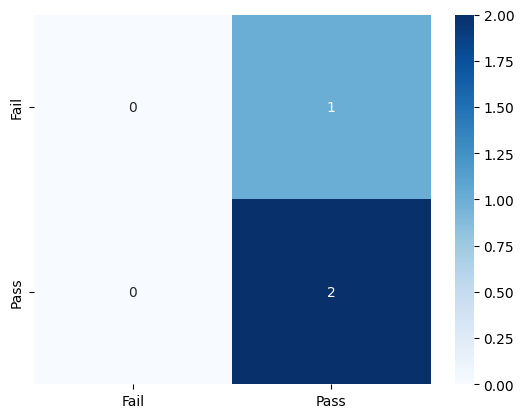

In [52]:
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Blues",xticklabels=['Fail','Pass'],yticklabels=['Fail','Pass'])

In [53]:
classfication_rep =classification_report(y_test,y_test_pred)
print(classfication_rep)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



C:\Users\abhia\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abhia\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abhia\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

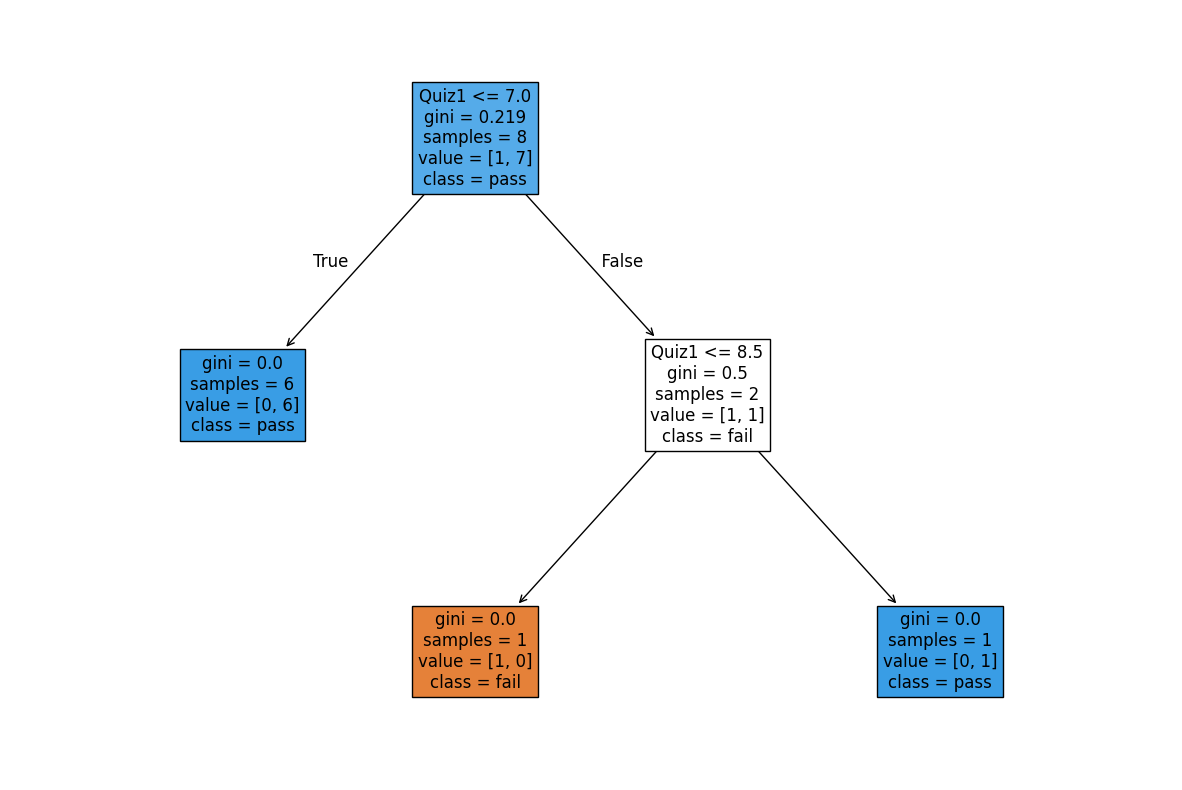

In [54]:
plt.figure(figsize=(15,10))
plot_tree(DecisionTree,feature_names=x.columns.tolist(),class_names=['fail','pass'],filled=True , fontsize=12)
plt.show()
